Medical Insurance Cost Prediction 


The next analysis provide a prediction of the cost of medical insurance depending of factors like age, sex, body mass index, number of children if the person is smoker, the region and charges. Those features represented by columns as been provided by IEEE Dataport.

In [1]:
#Libraries import for several functions on the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Load the data from the csv to the dataframe
df = pd.read_csv('insurance.csv')

In [3]:
#Shows only the first five registers on the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#With shape, the number of rows and columns are defined to the dataframe
df.shape

(1338, 7)

In [5]:
#With info, the dataframe shows the type of the columns, the name and the number of entries(rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# The next functions are used to find the number of missing or NaN values in each column of the DataFrame df
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Provides statistical summary of the DataFrame, in this case for each column and using the 1338 entries.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


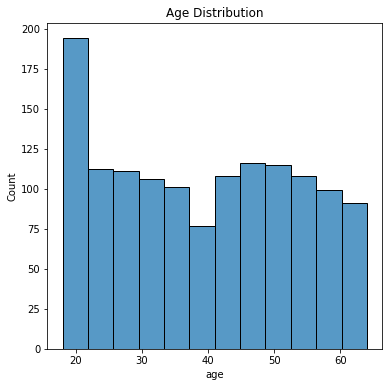

In [10]:
#Now shows the distribution of the age for the 1338 entries, in this case, the major of entries are at age of 20 and the minor are at 40 age.
plt.figure(figsize=(6,6))
sns.histplot(df['age'])
plt.title("Age Distribution")
plt.show()

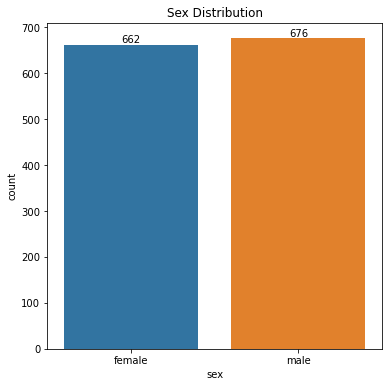

In [9]:
#Now we plot the count of the sex distribution of the entries, and shows the quantity of each sex.
plt.figure(figsize=(6,6))
ax = sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [11]:
#Only show the quantity of the sex distribution, not the plot.
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

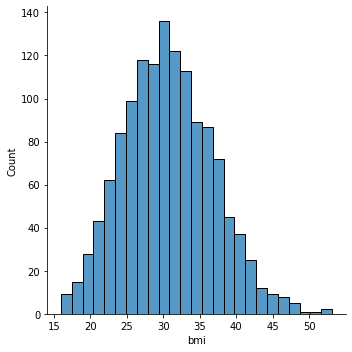

In [13]:
#This plot shows the distribution of the bmi for the 1338 entries, where we can find the tendance for bmi between 30 and 35.
sns.displot(df['bmi'])
plt.show()

In [14]:
#Now we count the distribution of the region and count the values.
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
#Now for be more easy to us summarize or identify on the dataframe, we change and set a diccionary for sex with the values to replace.
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [17]:
#As in the last cell, we do the same but now with the smoker case
df.replace({'smoker':{'yes':0,'no':1}},inplace=True )

In [18]:
#We do the same now with region case
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [19]:
#Now we should separates the feature variables (independent variables) from the target variable (dependent variable) in a DataFrame, in this case X and Y. 
X = df.drop(columns="charges",axis=1)#Assign to x the dataframe withouth the column charges
y = df['charges']#Assign to y the column charges

In [20]:
X #Shows the dataframe without charges column

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [21]:
y #Shows the column charges as independent variable

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [22]:
#Now set the variables for train an test for X and Y, (dependant and independent) using only the 20% of the data for testing and the remaining 80% of data for training.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
X_train.shape

(1070, 6)

In [24]:
X_test.shape

(268, 6)

In [25]:
#Now defines reg as a shortcut for LinearRegression function who performs as ine to predict the projected forecast for new data.
reg = LinearRegression()

In [26]:
#Now is time to train the model using X_train as input data and y_train as target data to be trained.
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
#For the prediction, now we create a new variable to register.
training_data_prediction = reg.predict(X_train)#Predict can use X_train as input for predict the next values.

In [28]:
#Now we declare r2_train,who is calculating the R-squared (coefficient of determination) score to evaluate the performance of a regression model.
r2_train = metrics.r2_score(y_train, training_data_prediction) 
'''Use metrics library function called r2_score, to calculate the R-Squared using y_train as target and the training data values that as been predicted using the model on the training dataset'''

'Use metrics library function called r2_score, to calculate the R-Squared using y_train as target and the training data values that as been predicted using the model on the training dataset'

In [29]:
r2_train #Shows the r_squared value

0.7517404369481091

In [30]:
#Now with the training data already prepared, we proceed to test using the predict function again
test_data_prediction = reg.predict(X_test)

In [31]:
#Now we replicate the same process to get r_squared but using the test data instead the training, in fact should be similar.
metrics.r2_score(y_test, test_data_prediction) 

0.7438270238033715

In [48]:
sample_input_data = (60,1,22.7,0,1,1) #Now we going to use age,sex,bmi,children,smoker,region sample input data to check if it works or not.

In [49]:
input_data_as_numpy_array = np.asarray(sample_input_data)#Now we convert the list to an array, this conversion provides a useful functionality for numerical operations.

In [50]:
#Now we declare a new variable and reshape the array if we reshapes it into a new array with 1 row and a number of columns calculated automatically based on the original data.
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [51]:
#Now the prediction can be calculated using the entry data input 
prediction = reg.predict(input_data_reshaped)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
print("The insurance cost is ",prediction)#Show the result

The insurance cost is  [10347.87696683]


Conclusion

As well as we can see in the prediction the variables depend and affect to charges directly because for example if in the input we have 2 cases, one with 60 years and the other with 20 years, the insurance cost increases because is more probably the 60 years case needs more treatments, medication and care in front of the younger case, children also affect but only for younger people, which means the cost increases because the children represent more care of the health, and as well as know, it would be more expensive in front if doesn't have children at that age. Finally, bmi and smoker also affect more than the region, because the model take as a primary feature all the features involved of the health instead the location or life cost for example. For my final thoughts, a medical insurance cost can be more precise depending of the number of variables into the data collection has been involved, in this case only use 7 variables, but if we use a little bit more like 10 or 12 can be more precise if we want.